In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print("The Missing values are:\n", data.isna().sum())

# Display rows that have at least one missing value
missing_rows = data[data.isna().any(axis=1)]
print("\nRows with missing values:\n", missing_rows)

The Missing values are:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Rows with missing values:
 Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [6]:
print(f"The Duplicates values are: \n",data.duplicated().sum())

The Duplicates values are: 
 0


In [7]:
df=data.copy()

In [8]:
# Dropping unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [9]:
for col in df.columns:
    print(f"the values counts for the {col}")
    print(df[col].value_counts())
    print("-"*40)

the values counts for the CreditScore
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
----------------------------------------
the values counts for the Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
----------------------------------------
the values counts for the Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64
----------------------------------------
the values counts for the Age
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
----------------------------------------
the values counts for the Tenure
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
----------------------------------------


In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


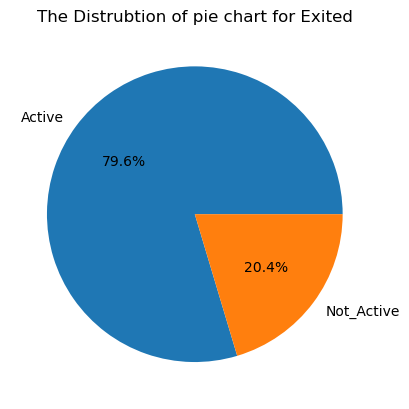

In [12]:
percentage=df['Exited'].value_counts(normalize=True)*100
classlabels=['Active','Not_Active']
plt.pie(percentage,labels=classlabels,autopct="%1.1f%%")
plt.title(f"The Distrubtion of pie chart for Exited")
plt.show()

In [13]:
cat_cols=[feature for feature in df.columns if df[feature].dtypes=="O"]
cat_cols

['Geography', 'Gender']

In [14]:
num_cols=[feature for feature in df.columns if df[feature].dtypes!="O"]
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

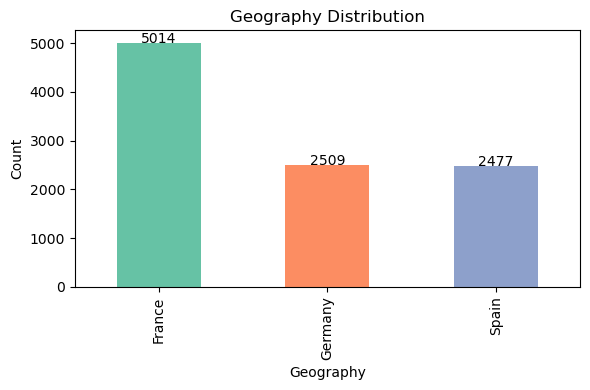

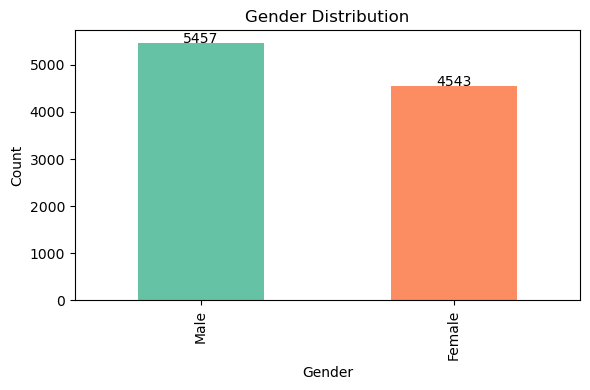

In [15]:
# Univariate Analysis of categorical columns
palette=sns.color_palette("Set2")

for col in cat_cols:
    plt.figure(figsize=(6,4))
    counts=df[col].value_counts()
    colors=palette[:len(counts)]
    
    ax = counts.plot(kind='bar', color=colors)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")

    for i, v in enumerate(counts):
        plt.text(i, v + 0.5, str(v), ha='center')

    plt.tight_layout()
    plt.show()

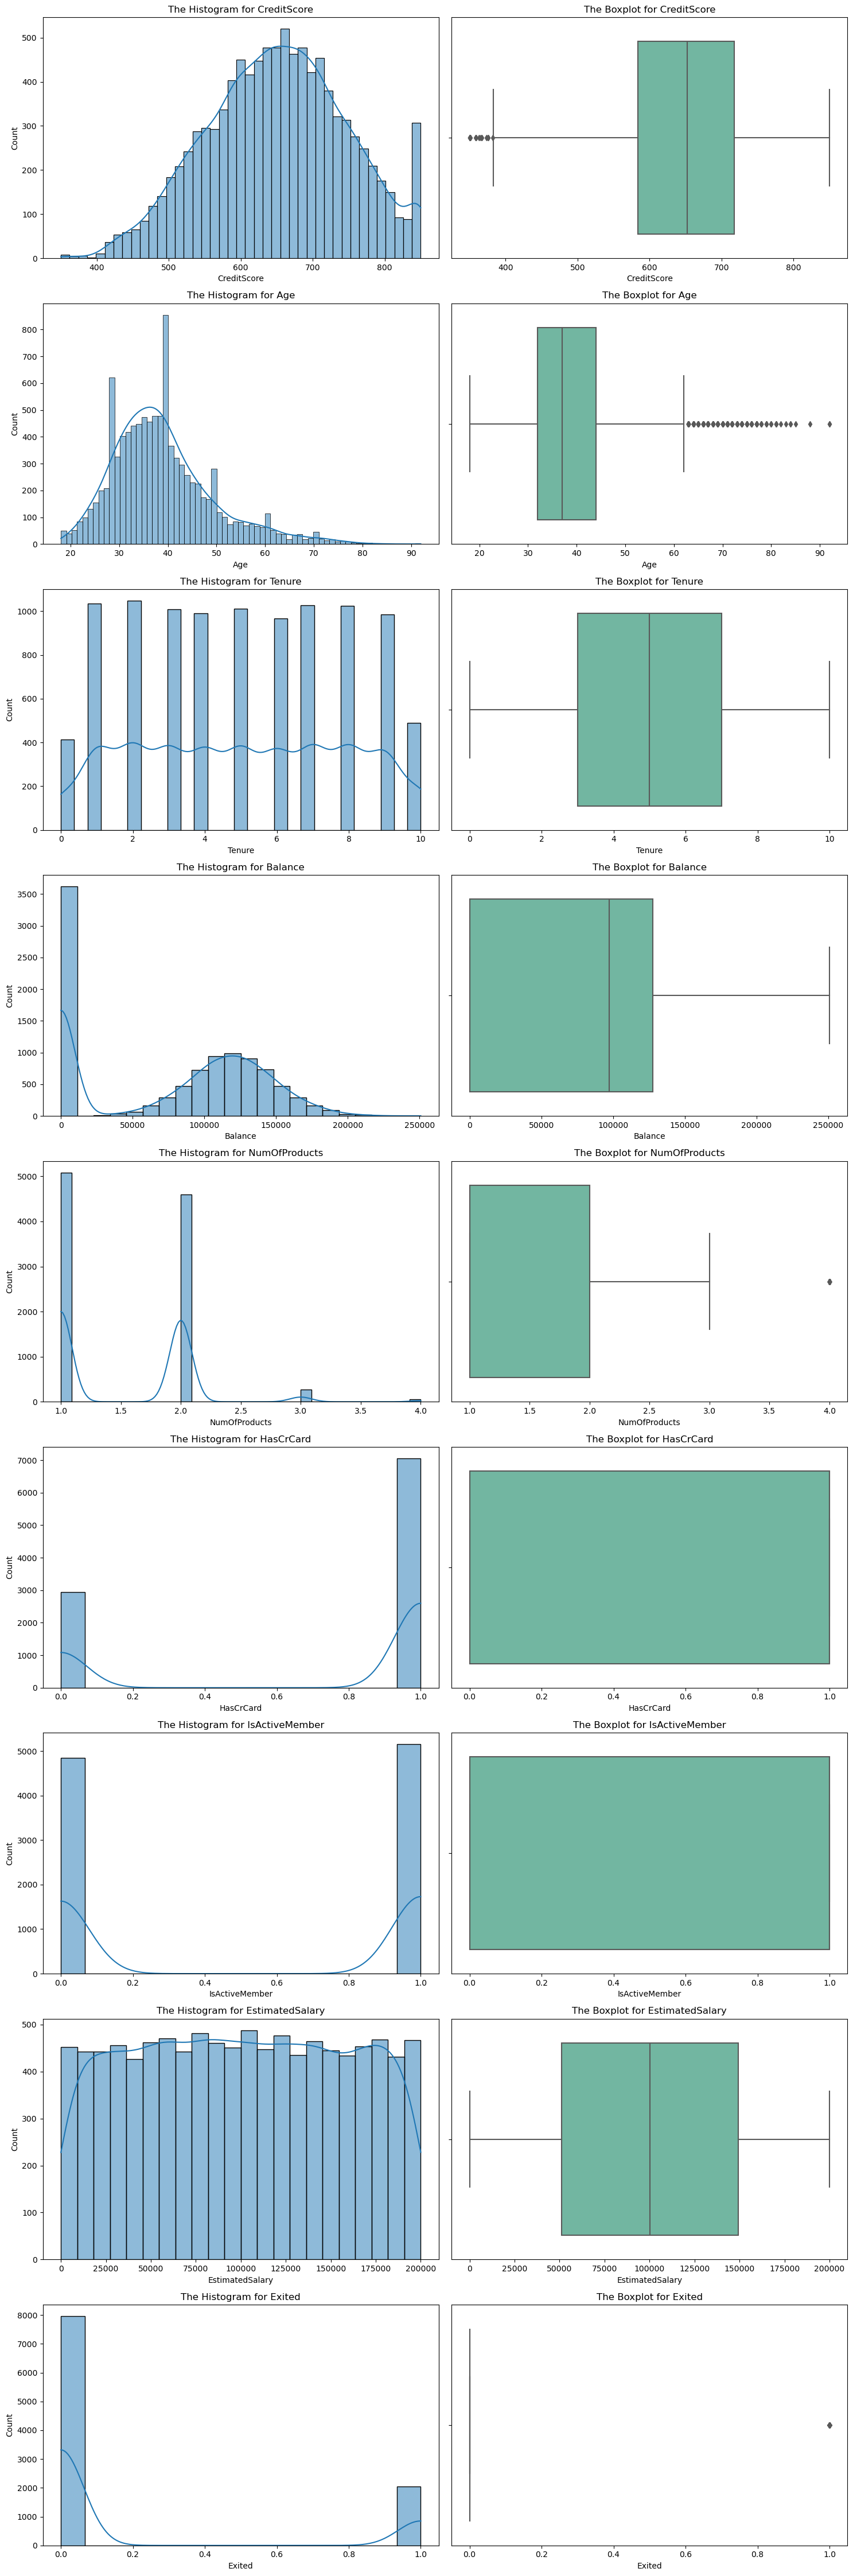

In [16]:
# Univariate Analysis of Numerical columns
def plot_num_dist(data,num_features):
    fig, axes=plt.subplots(len(num_features),2,figsize=(15, len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    for i,column in enumerate(num_features):
        sns.histplot(data=data, x=column, ax=axes[i][0], kde=True,palette="viridis")
        axes[i][0].set_title(f"The Histogram for {column}")
        sns.boxplot(data=data, x=column, ax=axes[i][1], palette="Set2")
        axes[i][1].set_title(f"The Boxplot for {column}")
    plt.tight_layout()
    plt.show()

plot_num_dist(df,num_cols)

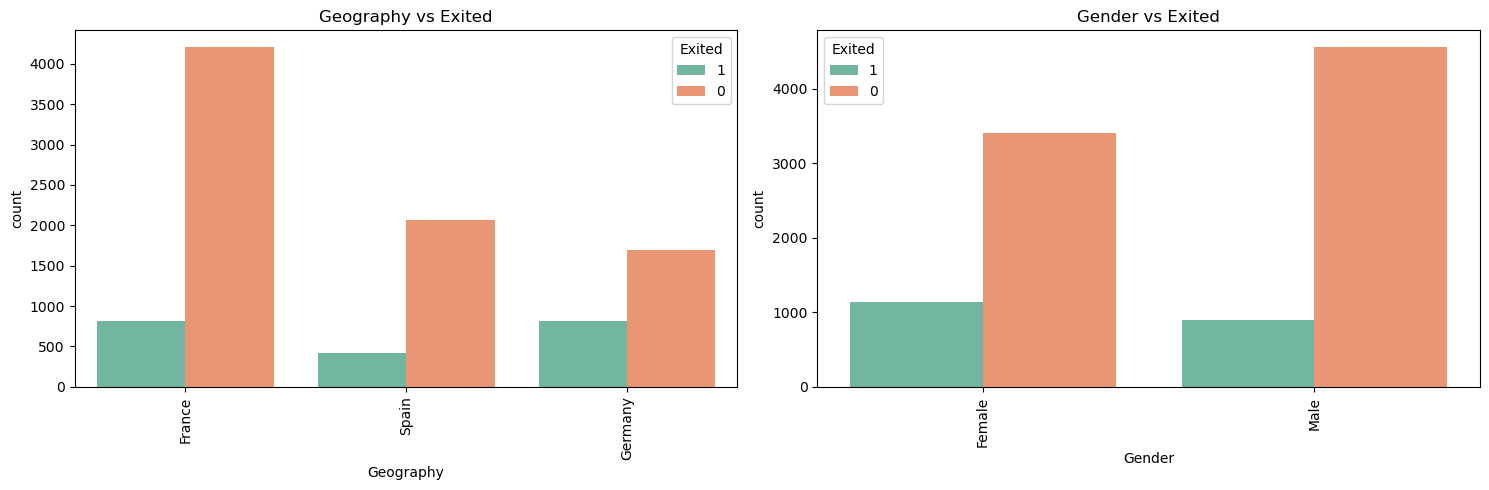

In [17]:
# Bivariate Analysis of categorical columns
def cat_bi_plot(data, target, cat_features):
    num_features=len(cat_features)
    num_rows=(num_features+1)//2
    fig, axes=plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes=axes.flatten()
    for i,column in enumerate(cat_features):
        sns.countplot(x=column,data=data,hue=data[target].astype(str),palette="Set2",ax=axes[i])
        axes[i].set_title(f"{column} vs {target}")
        axes[i].tick_params(axis='x',rotation=90)
    plt.tight_layout()
    plt.show()

cat_bi_plot(df,'Exited',cat_cols)

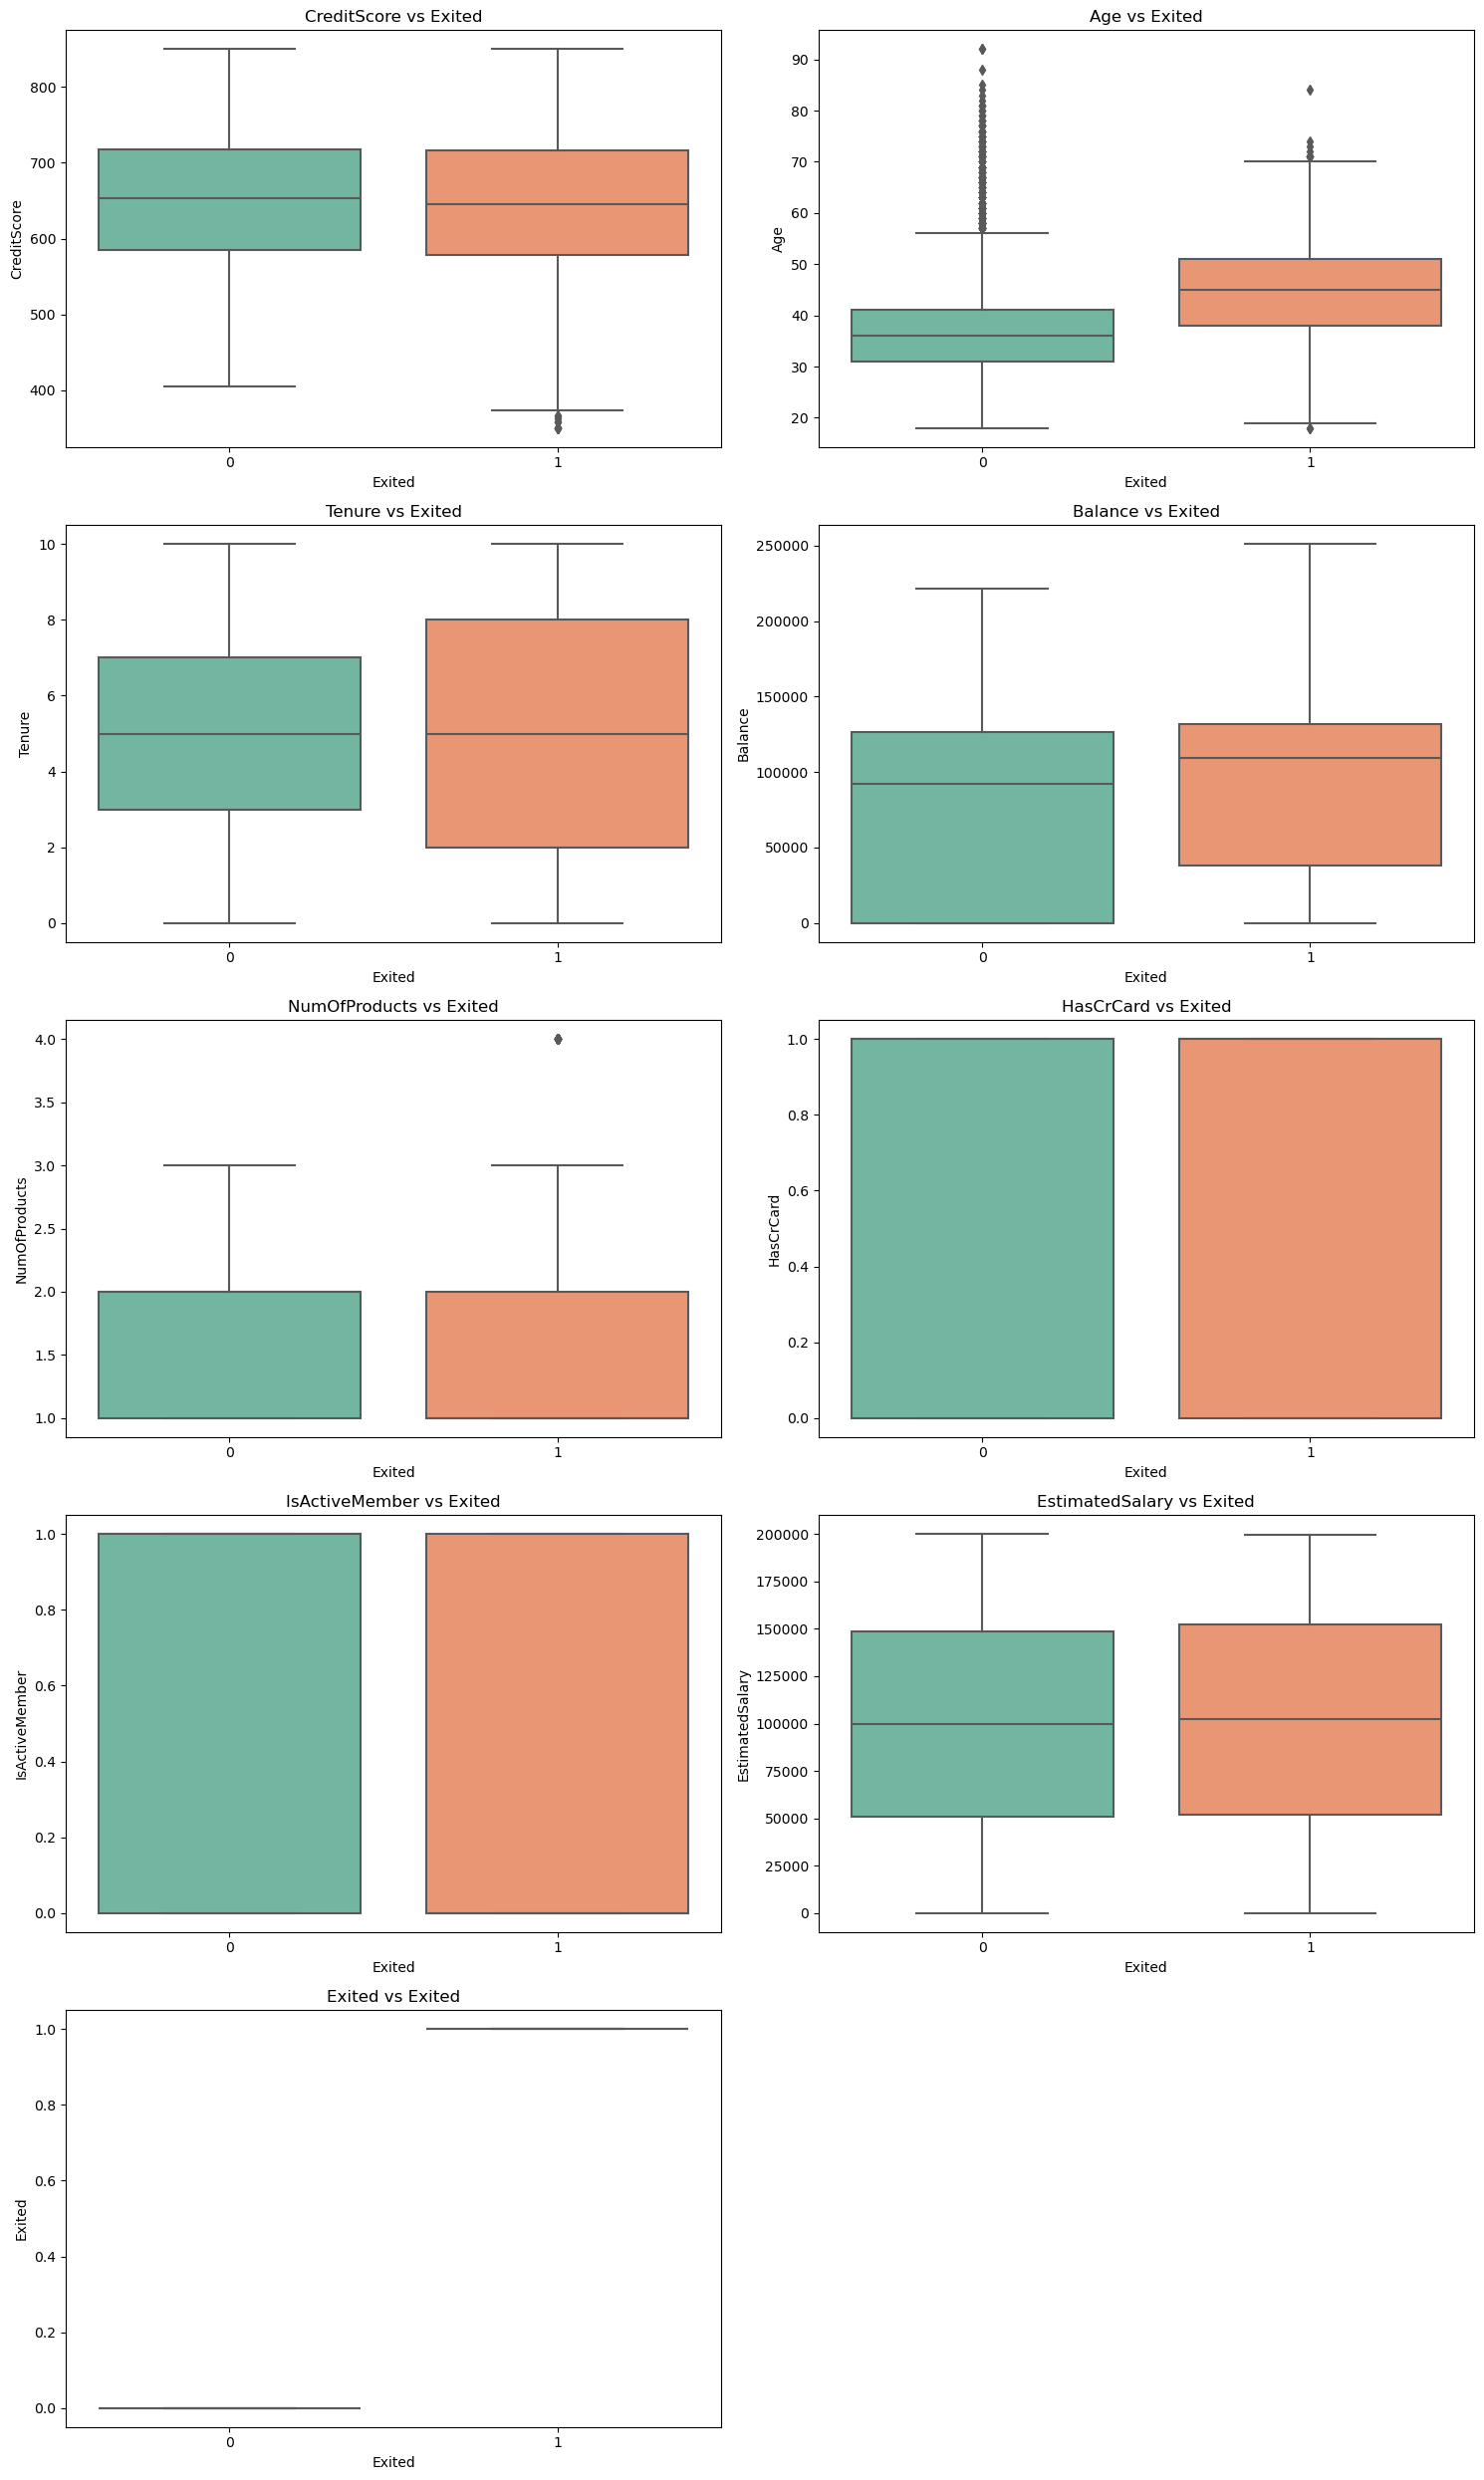

In [18]:
# Bivariate Analysis of numeric columns
def plot_num_dist(data, target, num_feature):
    num_features=len(num_feature)
    num_rows=(num_features+1)//2
    fig, axes=plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes=axes.flatten()
    
    for i,column in enumerate(num_feature):
        sns.boxplot(data=data, x=target, y=column, ax=axes[i], palette='Set2')
        axes[i].set_title(f"{column} vs {target}")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_num_dist(df, 'Exited', num_cols)

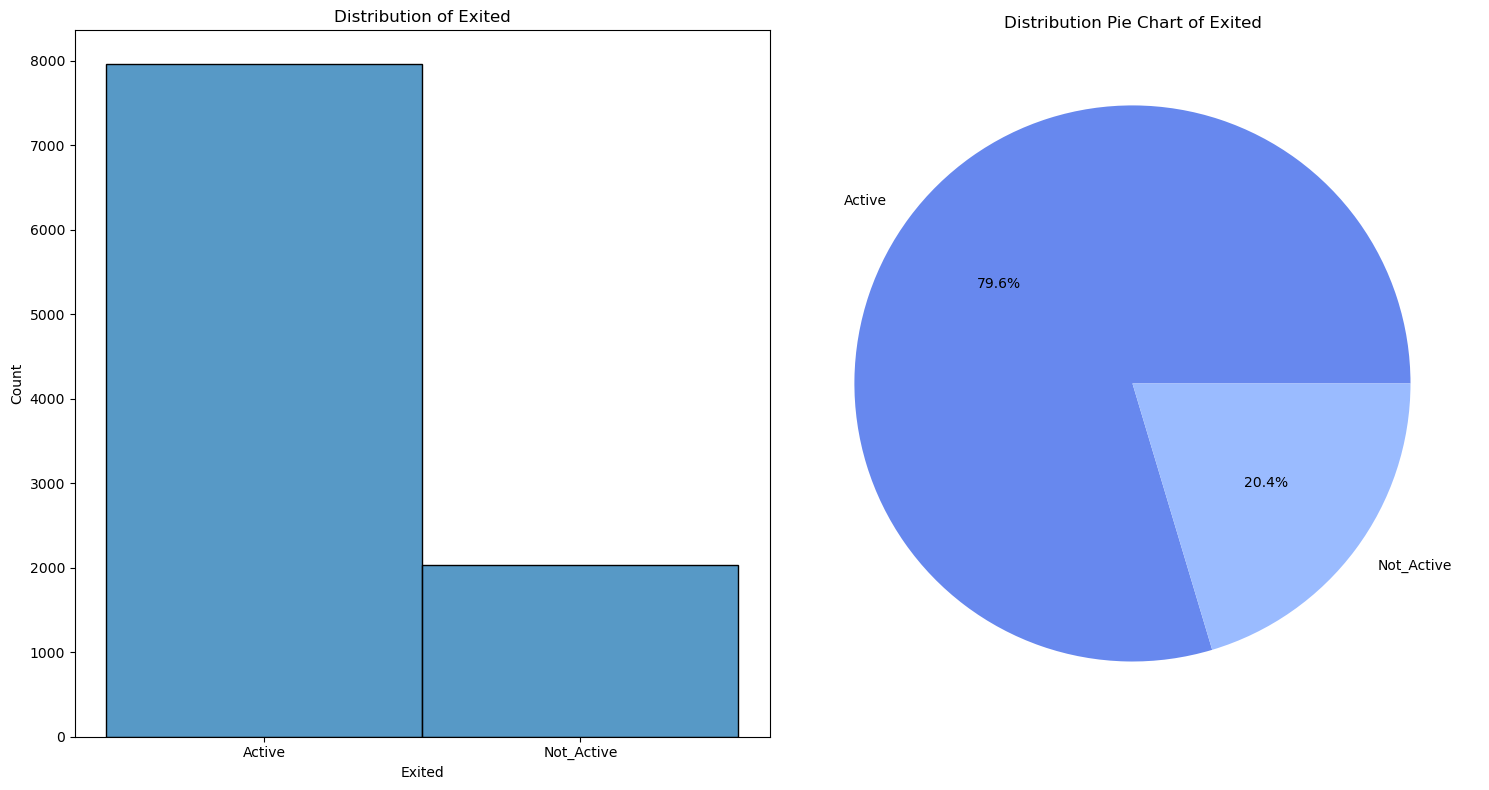

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Bar/histogram
sns.histplot(data=df, x='Exited', palette='coolwarm', ax=axes[0], discrete=True)
axes[0].set_title("Distribution of Exited")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(classlabels)
axes[0].tick_params(axis='x', rotation=0)

# Pie chart (plot directly on the axis using fig.pie-like approach)
axes[1].pie(percentage, labels=classlabels, autopct="%1.1f%%", colors=sns.color_palette("coolwarm"))
axes[1].set_title("Distribution Pie Chart of Exited")

plt.tight_layout()
plt.show()

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# converting our categorcial data into numeric format

In [21]:
gender_map = {'Male': 1, 'Female': 0}
df['Gender']=df['Gender'].map(gender_map)

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
geo_encoder=encoder.fit_transform(df[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [25]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [26]:
geo_df = pd.DataFrame(geo_encoder.toarray(), columns=encoder.get_feature_names_out(['Geography']))
geo_df.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [27]:
final_df=pd.concat([df.drop('Geography',axis=1),geo_df],axis=1)

In [28]:
final_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


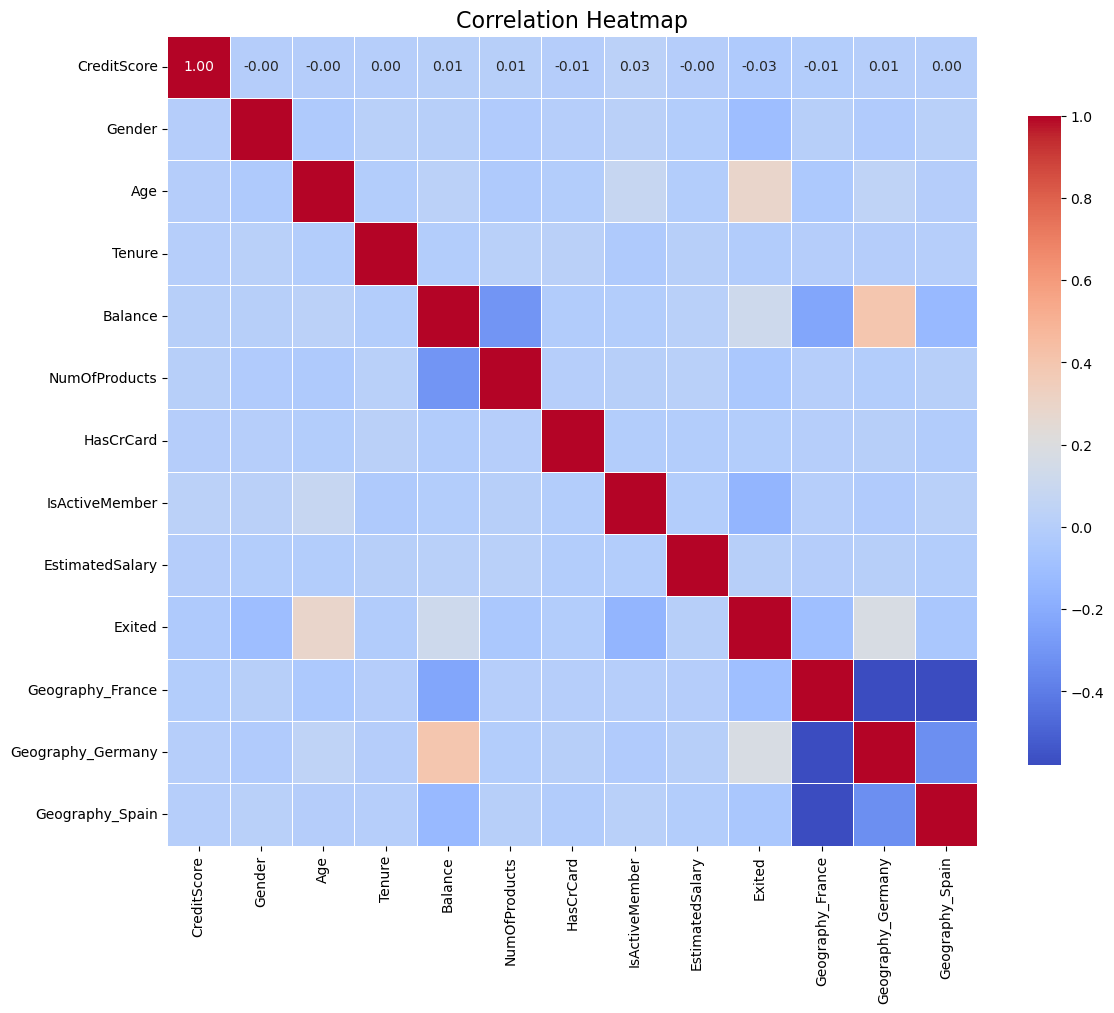

In [29]:
corr=final_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
# save the encoder to scaler
import pickle
with open('gender_map.pkl','wb') as file:
    pickle.dump(gender_map,file)

with open('encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

In [31]:
X=final_df.drop('Exited',axis=1)
y=data['Exited']

In [32]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [33]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Handling Im-Balanced Dataset

In [34]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_res, y_res=smote.fit_resample(X,y)

In [35]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [36]:
balanced_data=pd.DataFrame(X_res,columns=X.columns)
balanced_data['Excited']=y_res

In [37]:
balanced_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Excited
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,0


In [38]:
df=balanced_data.copy()
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Excited
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,0


In [39]:
# Dividing data into Independent and Dependent varible
X=final_df.drop('Exited',axis=1)
y=data['Exited']

In [40]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [41]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaler

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [44]:
X_train_scaled

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [45]:
X_test_scaled

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [46]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

# ANN Implementation

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [48]:
X_train_scaled[1]

array([-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
        0.80843615,  0.64920267,  0.97481699,  1.6612541 , -0.99850112,
        1.72572313, -0.57638802])

In [49]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
opt=tf.optimizers.Adam(learning_rate=0.01)
loss=tf.losses.BinaryCrossentropy()


In [52]:
# complie the model
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [58]:
## setup the tensorboard
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [54]:
# Setup Early Stopping
early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
# Train the model
history=model.fit(
    X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8085 - loss: 0.4328 - val_accuracy: 0.8625 - val_loss: 0.3507
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8570 - loss: 0.3627 - val_accuracy: 0.8595 - val_loss: 0.3491
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8535 - loss: 0.3460 - val_accuracy: 0.8600 - val_loss: 0.3490
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8639 - loss: 0.3332 - val_accuracy: 0.8540 - val_loss: 0.3508
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8618 - loss: 0.3369 - val_accuracy: 0.8585 - val_loss: 0.3439
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8604 - loss: 0.3395 - val_accuracy: 0.8590 - val_loss: 0.3532
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8632 - loss: 0.3373 - val_accuracy: 0.8545 - val_loss: 0.3587
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8704 - loss: 0.3163 - val_accu

In [55]:
model.save('model.h5')

# Load Tensorboard 

In [56]:
import matplotlib
matplotlib.use('agg')

In [57]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 17772), started 0:08:59 ago. (Use '!kill 17772' to kill it.)